## Exercise

Read and write a CSV file containing:

<pre>
artist,song,length
ZZ Top,La Grange,3:50
Iron Butterfly,In-A-Gadda-Da-Vida,17:04
Led Zeppelin,Whole Lotta Love,5:33
</pre>

In [4]:
text = '''artist,song,length
ZZ Top,La Grange,3:50
Iron Butterfly,In-A-Gadda-Da-Vida,17:04
Led Zeppelin,Whole Lotta Love,5:33
'''

with open('some_csv.csv', 'w') as file:
    file.write(text)

In [7]:
with open('some_csv.csv', 'r') as file:
    print(''.join(file.readlines()))


artist,song,length
ZZ Top,La Grange,3:50
Iron Butterfly,In-A-Gadda-Da-Vida,17:04
Led Zeppelin,Whole Lotta Love,5:33



In [25]:
import csv

with open('some_csv.csv', 'r') as file:
    csv_in = csv.reader(file, delimiter=';')
    header = next(csv_in)
    print('Header', header)
    for i, row in enumerate(csv_in, start=1):
        print(i, row)

Header ['artist', 'song', 'length']
1 ['ZZ; Top', 'La Grange', '3:50']
2 ['Iron Butterfly', 'In-A-Gadda-Da-Vida', '17:04']
3 ['Led Zeppelin', 'Whole Lotta Love', '5:33']


In [19]:
data = [
    ['artist', 'song', 'length'],
    ['ZZ; Top', 'La Grange', '3:50'],
    ['Iron Butterfly', 'In-A-Gadda-Da-Vida', '17:04'],
    ['Led Zeppelin', 'Whole Lotta Love', '5:33']
]

with open('some_csv.csv', 'w', newline='') as file:
    csv_out = csv.writer(file, delimiter=';')
    for row in data:
        csv_out.writerow(row)

## Exercise

Save the following to a JSON file:

```
[
    {'id': 42, 'value': 'Something exciting'},
    {'value': 'Also exciting news', 'id': 7}
]
```

In [32]:
import json

data = (
    {'id': 42, 'value': 'Something exciting'},
    {'value': 'Also exciting news', 'id': 7}
)

with open('some_json.json', 'w') as file:
    json.dump(data, file, indent=4, sort_keys=True)

In [35]:
with open('some_json.json', 'r') as file:
    data = json.load(file)
print(data)
print(data[1]['value'])

[{'id': 42, 'value': 'Something exciting'}, {'id': 7, 'value': 'Also exciting news'}]
Also exciting news


In [40]:
import pickle

data = (
    {'id': 42, 'value': 'Something exciting'},
    {'value': 'Also exciting news', 'id': 7}
)

with open('some_pickle.pickle', 'wb') as file:
    pickle.dump(data, file)

In [42]:

with open('some_pickle.pickle', 'rb') as file:
    new_data = pickle.load(file)
print(new_data)

({'id': 42, 'value': 'Something exciting'}, {'value': 'Also exciting news', 'id': 7})


In [45]:
with open('some_pickle.pickle', 'rb') as file:
    bytes = file.read()
print(bytes)
for byte in bytes:
    print(byte, end=' ')

b'\x80\x04\x95J\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x02id\x94K*\x8c\x05value\x94\x8c\x12Something exciting\x94u}\x94(h\x02\x8c\x12Also exciting news\x94h\x01K\x07u\x86\x94.'
128 4 149 74 0 0 0 0 0 0 0 125 148 40 140 2 105 100 148 75 42 140 5 118 97 108 117 101 148 140 18 83 111 109 101 116 104 105 110 103 32 101 120 99 105 116 105 110 103 148 117 125 148 40 104 2 140 18 65 108 115 111 32 101 120 99 105 116 105 110 103 32 110 101 119 115 148 104 1 75 7 117 134 148 46 

## Exercise

XML - Open Street Map

Download a small map from www.openstreetmap.org as XML and plot it using matplotlib.

In [48]:
import xml.etree.ElementTree as ET

tree = ET.parse('map.osm')
root = tree.getroot()

In [93]:
points = {}
for child in root:
    if child.tag == 'node':
        point_id, lat, lon = child.attrib['id'], float(child.attrib['lat']), float(child.attrib['lon'])
        points[point_id] = (lat, lon)

In [74]:
import matplotlib.pyplot as plt

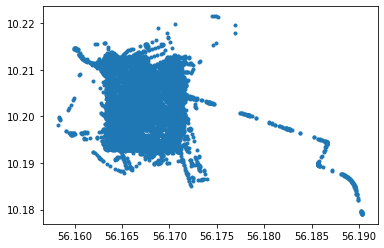

In [101]:
xs, ys = zip(*points.values())
plt.plot(xs, ys, '.')
plt.show()

In [94]:
ways = []
for child in root:
    if child.tag == 'way':
        for tag in child:
            if tag.tag == 'tag' and tag.attrib.get('k') == 'highway':
                P = [tag.attrib['ref'] for tag in child if tag.tag == 'nd']
                ways.append(P)
                break

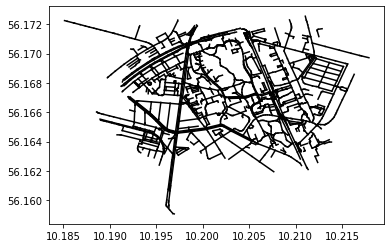

In [104]:
for way in ways:
    for p, q in zip(way, way[1:]):
        py, px = points[p]
        qy, qx = points[q]
        plt.plot([px, qx], [py, qy], '-k')
plt.show()